In [15]:
import numpy as np
import mygrad as mg
import matplotlib.pyplot as plt
import matplotlib.mlab as lab
import librosa
from utils import get_audio_path

In [16]:
data = np.load("data/songs.npz")
ids = data["data_id"]
genres = data["data_y"]
BASE = "fma_small"

In [17]:
l = []
for i,id in enumerate(ids):
    if i % 1000 == 0 and i != 0:
        print("{} done!".format(i))
        l = np.transpose(np.array(l), (0,2,1))
        np.save("data/song_fourier_{}".format(i), l)
        l = []
    song, _ = librosa.load(get_audio_path(BASE, id), sr=44100)
    s,f,t = lab.specgram(song,Fs=44100,NFFT=200)
    if s.shape[-1] <= 3000:
        continue
    l.append(np.log(s+1e-10)[:,:3500])


/anaconda3/lib/python3.6/site-packages/matplotlib/mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=200) >= signal length (=0).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))


1000 done!
2000 done!
3000 done!
4000 done!
5000 done!
6000 done!


/anaconda3/lib/python3.6/site-packages/matplotlib/mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=200) >= signal length (=0).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))
/anaconda3/lib/python3.6/site-packages/matplotlib/mlab.py:1274: UserWarning: Only one segment is calculated since parameter NFFT (=200) >= signal length (=0).
  "(=%d) >= signal length (=%d)." % (NFFT, len(x)))


7000 done!


In [18]:
l = np.transpose(np.array(l), (0,2,1))
np.save("data/song_fourier_8000",l)

(91, 251, 3500)
[[-11.57531255 -11.85127279 -11.15233645 ... -10.73074162 -11.0140941
  -13.88682345]
 [-10.61149294 -11.04360714  -8.75177347 ...  -9.47889965  -9.89095298
  -11.96048265]
 [-10.70951354 -11.48410935  -9.03444567 ...  -9.41700561  -9.25772384
   -9.72138943]
 ...
 [-23.02582942 -23.02583107 -23.02583989 ... -23.02580802 -23.02574775
  -23.02584396]
 [-23.02584375 -23.02584898 -23.02584943 ... -23.02580139 -23.02565958
  -23.02583467]
 [-23.02584707 -23.02584863 -23.02585093 ... -23.02581608 -23.02564957
  -23.02585086]]


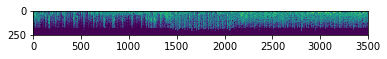

In [14]:
print(np.array(l).shape)
print(l[0])
fig,ax = plt.subplots()
ax.imshow(l[0]);